## 学习向量量化

1.初始化p个原型向量{x1, x2, ... xp}，赋予其c_p个类别

2.DO

- 随机选择样本x_i

- 找到最近的原型向量，更新原型向量
   
    if 标记一致
       p' = p_i + delta * (x_j - p_i)
    else
       p' = p_i - delta * (x_j - p_i)
 
3.输出原型向量, 和区域

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
%matplotlib inline

## 初始化数据集和原型向量

In [2]:
x, y = make_classification(n_samples=1000, n_features=8, n_informative=5, n_redundant=2, n_repeated=1, 
                           n_classes=5, n_clusters_per_class=2, random_state=2018)
print(x.shape, y.shape)

(1000, 8) (1000,)


### t-sne降维可视化

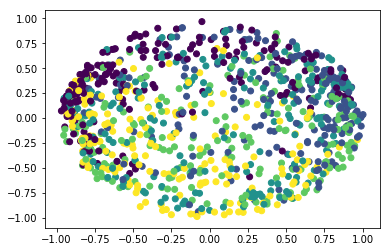

In [3]:
from sklearn.manifold import TSNE
pca = KernelPCA(n_components=2,kernel='cosine', random_state=2018)
pca.fit(x)
reduced_x = np.array(pca.transform(x))
plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=y)

### 初始化原型向量

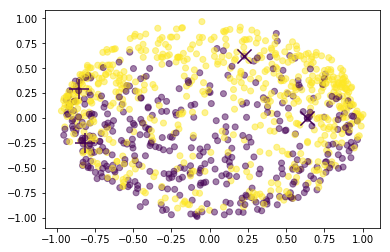

In [4]:
n_p = 4   # 4个原型向量
ps = None   # 原型向量
y_new = np.where(y<3, 1, 0)
reduced_p = None
while(1):
    index = np.random.choice(1000, 4)
    ps = x[index]
    y_p = y_new[index]
    reduced_p = reduced_x[index, :]
    if sum(y_p) == 2:
        break
plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=y_new, alpha=0.5)
for i in range(n_p):
    if y_p[i] == 0:
        plt.scatter(reduced_p[i, 0], reduced_p[i, 1], s=200, marker='x', c=(y_p[i]+5)*2)
    else:
        plt.scatter(reduced_p[i, 0], reduced_p[i, 1], s=400, marker='+', c=(y_p[i]+5)*2)

## 随机挑选样本并学习

In [5]:
n_epoch = int(1e4)
learning_rate = 0.1
for i in range(n_epoch):
    index = np.random.choice(1000)
    min_d = np.inf
    p_index = None
    for j in range(n_p):
        dist = np.linalg.norm(x[index] - ps[j])
        if dist < min_d:
            min_d = dist
            p_index = j
        else:
            pass
    if y_new[index] == y_new[p_index]:
        ps[p_index] += learning_rate * (x[index] - ps[p_index])
    else:
        ps[p_index] -= learning_rate * (x[index] - ps[p_index])
print("train over!")

train over!


## 显示聚类结果

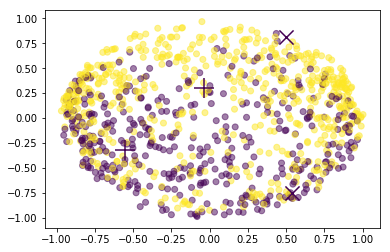

In [6]:
plt.figure()
plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c = y_new, alpha=0.5)
ps_reduced = pca.transform(ps)
for i in range(n_p):
    if y_p[i] == 0:
        plt.scatter(ps_reduced[i, 0], ps_reduced[i, 1], s=200, marker='x', c=y_p[i])
    else:
        plt.scatter(ps_reduced[i, 0], ps_reduced[i, 1], s=400, marker='+', c=y_p[i])
plt.show()